# Машинное обучение, ФКН ВШЭ

# Практическое задание 6. Бустинговое

## Общая информация

Дата выдачи: 12.12.2024

Мягкий дедлайн: 22.12.2024 23:59 MSK

Жёсткий дедлайн: 22.12.2024 23:59 MSK

## Оценивание и штрафы

Каждая из задач имеет определенную «стоимость» (указана в скобках около задачи). Максимально допустимая оценка за работу — 10 баллов.

Задание выполняется самостоятельно. «Похожие» решения считаются плагиатом и все задействованные студенты (в том числе те, у кого списали) не могут получить за него больше 0 баллов (подробнее о плагиате см. на странице курса). Если вы нашли решение какого-то из заданий (или его часть) в открытом источнике, необходимо указать ссылку на этот источник в отдельном блоке в конце вашей работы (скорее всего вы будете не единственным, кто это нашел, поэтому чтобы исключить подозрение в плагиате, необходима ссылка на источник).

Неэффективная реализация кода может негативно отразиться на оценке.

## Формат сдачи
Задания сдаются через систему anytask. Посылка должна содержать:
* Ноутбук homework-practice-06-Username.ipynb

Username — ваша фамилия на латинице

Disclaimer: Colab обновился и теперь не подгружаются файлы через !wget, поэтому пишу каждый раз класс, добавляя обновления, которые нужны, boosting.py содержит итоговый (самый последний) код.

## О задании

В этом задании вам предстоит вручную запрограммировать один из самых мощных алгоритмов машинного обучения — бустинг. Однако с большой силой приходит и большая ответственность, так что заодно научимся, как его правильно готовить

In [46]:
from warnings import filterwarnings

import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from scipy.sparse import load_npz
from sklearn.model_selection import train_test_split

sns.set(style='darkgrid')
filterwarnings('ignore')

In [47]:
!wget  -O 'x.npz' -q 'https://www.dropbox.com/scl/fi/50mlr1o02k90b2mi05m39/x.npz?rlkey=f45qxmn707idusycqypk6mi1y&st=mvup2q9a&dl=0'
!wget  -O 'y.npy' -q 'https://www.dropbox.com/scl/fi/cyj4u3aphdpqq3guutzfe/y.npy?rlkey=jqfw32h963ghjzbtxvx4cg1f5&st=9jnp76t7&dl=0'

In [48]:
X = load_npz('x.npz')
y = np.load('y.npy')

Разделим на обучающую, валидационную и тестовую выборки (оставьте `random_state=1337` для воспроизводимости).

In [49]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1337)
X_test, X_valid, y_test, y_valid = train_test_split(X_test, y_test, test_size=0.5, random_state=1337)

X_train.shape, X_valid.shape, X_test.shape

((18825, 169), (2354, 169), (2353, 169))

---

## Задание 1. Базовый градиентный бустинг (4 балла + 0.5 бонус)

Первая часть посвящена реализации собственного градиентного бустинга. Обращаем внимание, что пользоваться готовыми реализациями <font color='lightcoral'>**нельзя**</font>, если специально не оговорено. На все <font color='plum'>**вопросы**</font> должен быть <font color='plum'>**ответ**</font>. В заданиях есть референсы для параметров, которые нужно сделать, на случай, если объяснение из ноутбука непонятно, тогда советуем обратиться к соответствующей документации

Вам нужно дописать код в файлике `boosting.py`. Для вас уже подготовлен шаблон класса `Boosting`, вы можете менять его по своему усмотрению.

### Инструкции для функций:

#### `__init__`

Обязательные параметры:
 - `base_model_class` - класс базовой модели нашего бустинга
 - `base_model_params` - словарь с гиперпараметрами для базовой модели
 - `n_estimators` - какое количество базовых моделей нужно обучить
 - `learning_rate` - темп обучения, должен быть из полуинтервала $(0, 1]$

#### `fit`

В `fit` приходит выборка, на которой мы обучаем новые базовые модели

Сначала нам нужно сделать какую-то нулевую модель, сделать предсказания (в шаблоне это нулевая модель, соответственно предсказания это просто `np.zeros`). После этого нужно обучить `n_estimators` базовых моделей (как и на что обучаются базовые модели смотрите в лекциях и семинарах). После каждой обученной базовой модели мы должны обновить текущие предсказания, посчитать ошибку на выборке (используем `loss_fn` для этого) и найти новую оптимальную гамму

После всего цикла обучения надо нарисовать график (если `plot=True`).

#### `partial_fit`

В `partial_fit` приходит обучающая выборка, на которую обучается новая базовая модель

#### `predict_proba`

В `predict_proba` приходит любая выборка, нужно предсказать вероятности для неё. Суммируем предсказания базовых моделей на этой выборке (не забываем про гаммы) и накидываем сигмоиду

#### `plot_history`

В `plot_history` приходит любая выборка, для которой последовательно считаются значения функции потерь и/или любой метрики, которую вы хотите посчитать, путем последовательного применения базовых моделей. Можно делать сразу во время обучения, можно делать иначе

In [ ]:
%load_ext autoreload

In [ ]:
%autoreload 2

from boosting import Boosting

### Проверка кода

У автора задания всё учится около одной секунды.

In [50]:
from __future__ import annotations
import matplotlib.pyplot as plt
from collections import defaultdict

import numpy as np
from sklearn.metrics import roc_auc_score
from sklearn.tree import DecisionTreeRegressor

from typing import Optional
from typing import Tuple


def score(clf, x, y):
    return roc_auc_score(y, clf.predict_proba(x)[:, 1])


class Boosting:

    def __init__(
        self,
        base_model_class = DecisionTreeRegressor,
        base_model_params: Optional[dict] = None,
        n_estimators: int = 10,
        learning_rate: float = 0.1,
    ):
        self.base_model_class = base_model_class
        self.base_model_params: dict = {} if base_model_params is None else base_model_params

        self.n_estimators: int = n_estimators

        self.models: list = []
        self.gammas: list = []

        self.learning_rate: float = learning_rate

        self.history = defaultdict(list) # {"train_roc_auc": [], "train_loss": [], ...}

        self.sigmoid = lambda x: 1 / (1 + np.exp(-x))
        self.loss_fn = lambda y, z: -np.log(self.sigmoid(y * z)).mean()
        self.loss_derivative = lambda y, z: - y / (1 + np.exp(y * z)) # Исправьте формулу на правильную.


    def partial_fit(self, X, y):
        model = self.base_model_class(**self.base_model_params)
        model.fit(X, y)
        self.models.append(model)
        return model

    def fit(self, X_train, y_train, X_val=None, y_val=None, plot=False):
        """
        :param X_train: features array (train set)
        :param y_train: targets array (train set)
        :param X_val: features array (eval set)
        :param y_val: targets array (eval set)
        :param plot: bool
        """
        train_predictions = np.zeros(y_train.shape[0])

        for i in range(self.n_estimators):
            model = self.partial_fit(X_train, - self.loss_derivative(y_train, train_predictions))
            new_preds = model.predict(X_train)
            gamma = self.find_optimal_gamma(y_train, train_predictions, new_preds)
            self.gammas.append(gamma)
            train_predictions = train_predictions + gamma * self.learning_rate * new_preds
            self.history["train_loss"].append(self.loss_fn(y_train, train_predictions))
            self.history["train_roc_auc"].append(self.score(X_train, y_train))

        if plot:
            self.plot_history()

    def predict_proba(self, X):
        total_predictions = np.zeros(X.shape[0])

        for i in range(len(self.models)):
          new_predicts = self.models[i].predict(X)
          gamma = self.gammas[i]
          total_predictions = total_predictions + gamma * self.learning_rate * new_predicts
          prob_1 = self.sigmoid(total_predictions)
          prob_0 = 1 - prob_1
          probs = np.column_stack((prob_0, prob_1))
        return probs

    def find_optimal_gamma(self, y, old_predictions, new_predictions) -> float:
        gammas = np.linspace(start=0, stop=1, num=100)
        losses = [self.loss_fn(y, old_predictions + gamma * new_predictions) for gamma in gammas]
        return gammas[np.argmin(losses)]

    def score(self, X, y):
        return score(self, X, y)

    def plot_history(self):
        """
        :param X: features array (any set)
        :param y: targets array (any set)
        """
        # подсчитывал в fit истории потерь или метрик для X_train, X_val (спрашивал у Danil Ivanov, он разрешил так делать), поэтому параметры X, y не нужны
        #if "train_loss" in self.history:
        x = range(len(self.history["train_loss"]))
        y = self.history["train_loss"]
        plt.plot(x, y, color='orange', linewidth=3)
        plt.xlabel('Итерация')
        plt.ylabel('Значения функции потерь')
        plt.title('График значения функции потерь от итерации на X_train')
        plt.show()

        if "valid_loss" in self.history:
          x = range(len(self.history["valid_loss"]))
          y = self.history["valid_loss"]
          plt.plot(x, y, color='orange', linewidth=3)
          plt.xlabel('Итерация')
          plt.ylabel('Значения функции потерь')
          plt.title('График значения функции потер от итерации на X_val')
          plt.show()

        #if "train_roc_auc" in self.history:
        x = range(len(self.history["train_roc_auc"]))
        y = self.history["train_roc_auc"]
        plt.plot(x, y, color='orange', linewidth=3)
        plt.xlabel('Итерация')
        plt.ylabel('Значения ROC-AUC')
        plt.title('График значения ROC-AUC от итерации на X_train')
        plt.show()

        if "valid_roc_auc" in self.history:
          x = range(len(self.history["valid_roc_auc"]))
          y = self.history["valid_roc_auc"]
          plt.plot(x, y, color='orange', linewidth=3)
          plt.xlabel('Итерация')
          plt.ylabel('Значения ROC-AUC')
          plt.title('График значения ROC-AUC от итерации на X_val')
          plt.show()

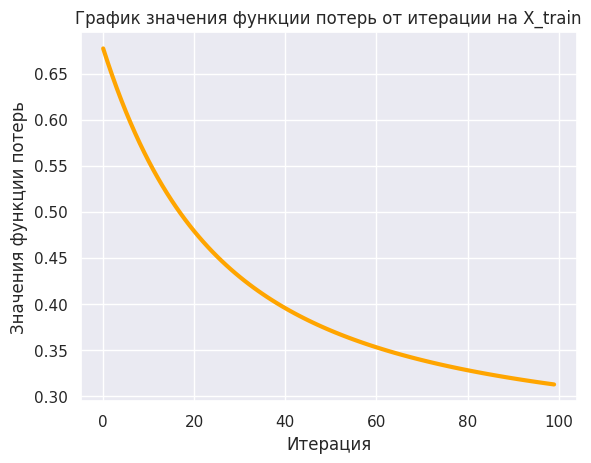

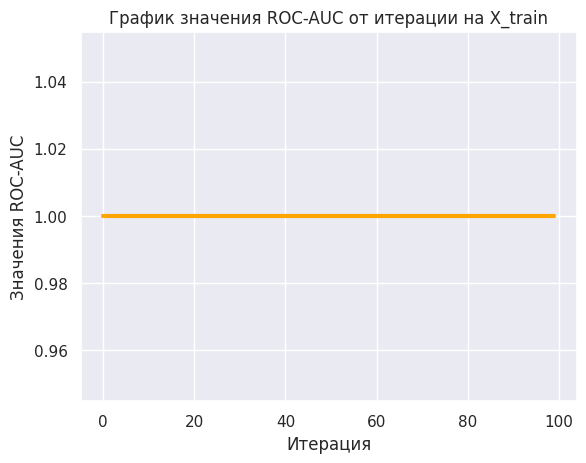

Train ROC-AUC 0.9998
Valid ROC-AUC 0.9073
Test ROC-AUC 0.9041


In [51]:
boosting = Boosting(n_estimators=100)

boosting.fit(X_train, y_train, plot=True)

assert len(boosting.models) == boosting.n_estimators
assert len(boosting.gammas) == boosting.n_estimators

assert boosting.predict_proba(X_test).shape == (X_test.shape[0], 2)

print(f'Train ROC-AUC {boosting.score(X_train, y_train):.4f}')
print(f'Valid ROC-AUC {boosting.score(X_valid, y_valid):.4f}')
print(f'Test ROC-AUC {boosting.score(X_test, y_test):.4f}')

### Бонус. Бустинг линейных моделей (0.5 балла)

**<font color='plum'>Вопрос:** что произойдет при ансамблировании линейных моделей? Имеет ли это смысл?</font>

<font color='plum'>**Ответ:** ...</font>

Давайте убедимся. Обучите бустинг, где в качестве базовой модели будет линейная регрессия. Обязательно сохраните историю функции потерь и зафиксируйте время обучения. Можно взять уже готовый из <font color='lightblue'>XGBoost</font>, но будьте готовы разобраться с тем, как оттуда достать историю обучения

| <font color='lightblue'>XGBoost</font> | <font color='lightgreen'>LightGBM</font> | <font color='palegoldenrod'>CatBoost</font> |
| --- | --- | --- |
| `XGBClassifier(booster="gblinear")` | - | - |

In [ ]:
# *𖣂♱𖠰𖣂↟*𖠰ᨒ↟*𖥧˚

Теперь возьмите `sklearn.linear_model.SGDClassifier` и обучите на тех же данных. Не забудьте вытащить историю функции потерь

In [ ]:
# *𖣂♱𖠰𖣂↟*𖠰ᨒ↟*𖥧˚

Покажите на одном графике изменение функции потерь для бустинга и SGD классификатора. Сравните следующие параметры у бустинга и линейной модели:

- время обучения
- число итераций до сходимости
- графики функции потерь

In [ ]:
# *𖣂♱𖠰𖣂↟*𖠰ᨒ↟*𖥧˚

<font color='plum'>**Вопрос:** Какой вывод вы можете сделать?</font>

<font color='plum'>**Ответ:** ... </font>

---

## Задание 2. Имплементация гиперпараметров (2.5 балла + 3 бонус)

Бустинг, как метод агрегации, предлагает несколько вариантов регуляризации безотносительно базовой модели. В этом пункте предлагается имплементировать часть из них. При необходимости можете обратиться к реализациям в вашей любимой библиотеке, там могут быть дополнительные пояснения и/или ссылки на оригинальные статьи

<font color='lightcoral'>**Важно!**</font> После добавления каждого параметра проверьте, как это повлияет на качество. Специально крутить параметры не нужно, но важно увидеть, что перформанс модели изменился, в худшую или в лучшую сторону, лучше всего это видно по графикfv обучения <font color='lightcoral'>**на трейне и валидации**</font>, последнюю мы сейчас и оформим

### 2.1. Борьба с переобучением (0.5 балла)

Как известно, бустинги бывают склонны к переобучению. Чтобы этого не допустить, можно контролировать процесс обучения и проверять критерий останова на валидации. Реализуйте такую процедуру, не забудьте, что всю предобработку, что вы будете делать для трейна, нужно будет повторить на валидации

| <font color='lightblue'>XGBoost</font> | <font color='lightgreen'>LightGBM</font> | <font color='palegoldenrod'>CatBoost</font> |
| --- | --- | --- |
| <td colspan=3>`early_stopping_rounds`, `eval_set` |

Добавьте параметры:
- `early_stopping_rounds: int | None = 10` - число раундов для критерия останова. Если качество ухудшается на протяжении всех раундов, останавливаем обучение
- `X_val`, `y_val` или `eval_set: Tuple[np.ndarray] | None = None` - валидацонная выборка, на которой будем проверять переобучение

In [52]:
from __future__ import annotations
import matplotlib.pyplot as plt
from collections import defaultdict

import numpy as np
from sklearn.metrics import roc_auc_score
from sklearn.tree import DecisionTreeRegressor

from typing import Optional
from typing import Tuple


def score(clf, x, y):
    return roc_auc_score(y, clf.predict_proba(x)[:, 1])


class Boosting:

    def __init__(
        self,
        base_model_class = DecisionTreeRegressor,
        base_model_params: Optional[dict] = None,
        n_estimators: int = 10,
        learning_rate: float = 0.1,
        early_stopping_rounds: int | None = 10,
        eval_set: Tuple[np.ndarray, np.ndarray] | None = None,
        subsample: float | int = 0.6,
        bagging_temperature: float | int = 1.0,
        bootstrap_type: str | None = 'Bernoulli'
    ):
        self.base_model_class = base_model_class
        self.base_model_params: dict = {} if base_model_params is None else base_model_params

        self.n_estimators: int = n_estimators

        self.models: list = []
        self.gammas: list = []

        self.learning_rate: float = learning_rate

        self.early_stopping_rounds: int = early_stopping_rounds
        self.eval_set: Tuple[np.ndarray, np.ndarray] | None = eval_set

        self.subsample: float | int = subsample
        self.bagging_temperature: float | int = bagging_temperature
        self.bootstrap_type: str | None = bootstrap_type


        self.history = defaultdict(list) # {"train_roc_auc": [], "train_loss": [], ...}

        self.sigmoid = lambda x: 1 / (1 + np.exp(-x))
        self.loss_fn = lambda y, z: -np.log(self.sigmoid(y * z)).mean()
        self.loss_derivative = lambda y, z: - y / (1 + np.exp(y * z)) # Исправьте формулу на правильную.


    def partial_fit(self, X, y):
        model = self.base_model_class(**self.base_model_params)
        model.fit(X, y)
        self.models.append(model)
        return model

    def fit(self, X_train, y_train, X_val=None, y_val=None, plot=False):
        """
        :param X_train: features array (train set)
        :param y_train: targets array (train set)
        :param X_val: features array (eval set)
        :param y_val: targets array (eval set)
        :param plot: bool
        """
        train_predictions = np.zeros(y_train.shape[0])

        if self.eval_set is not None:
          X_val = self.eval_set[0]
          y_val = self.eval_set[1]
          valid_predictions = np.zeros(y_val.shape[0])
          abs_of_imp_count = 0 # считаю, что early_stopping_rounds всегда больше 0 (как минимум 1)
          best_qual = -1


        for i in range(self.n_estimators):
            model = self.partial_fit(X_train, - self.loss_derivative(y_train, train_predictions))
            new_preds = model.predict(X_train)
            gamma = self.find_optimal_gamma(y_train, train_predictions, new_preds)
            self.gammas.append(gamma)
            train_predictions = train_predictions + gamma * self.learning_rate * new_preds
            self.history["train_loss"].append(self.loss_fn(y_train, train_predictions))
            self.history["train_roc_auc"].append(self.score(X_train, y_train))

            if self.eval_set is not None:
              new_valid_preds = model.predict(X_val)
              valid_predictions = valid_predictions + gamma * self.learning_rate * new_valid_preds
              self.history["valid_loss"].append(self.loss_fn(y_val, valid_predictions))
              self.history["valid_roc_auc"].append(self.score(X_val, y_val))

              if self.history["valid_roc_auc"][-1] < best_qual:
                abs_of_imp_count += 1

              else:
                abs_of_imp_count = 0
                best_qual = self.history["valid_roc_auc"][-1]

              if abs_of_imp_count == self.early_stopping_rounds:
                break

        if plot:
            self.plot_history()

    def predict_proba(self, X):
        total_predictions = np.zeros(X.shape[0])

        for i in range(len(self.models)):
          new_predicts = self.models[i].predict(X)
          gamma = self.gammas[i]
          total_predictions = total_predictions + gamma * self.learning_rate * new_predicts
          prob_1 = self.sigmoid(total_predictions)
          prob_0 = 1 - prob_1
          probs = np.column_stack((prob_0, prob_1))
        return probs

    def find_optimal_gamma(self, y, old_predictions, new_predictions) -> float:
        gammas = np.linspace(start=0, stop=1, num=100)
        losses = [self.loss_fn(y, old_predictions + gamma * new_predictions) for gamma in gammas]
        return gammas[np.argmin(losses)]

    def score(self, X, y):
        return score(self, X, y)

    def plot_history(self):
        """
        :param X: features array (any set)
        :param y: targets array (any set)
        """
        # подсчитывал в fit истории потерь или метрик для X_train, X_val (спрашивал у Danil Ivanov, он разрешил так делать), поэтому параметры X, y не нужны
        #if "train_loss" in self.history:
        x = range(len(self.history["train_loss"]))
        y = self.history["train_loss"]
        plt.plot(x, y, color='orange', linewidth=3)
        plt.xlabel('Итерация')
        plt.ylabel('Значения функции потерь')
        plt.title('График значения функции потерь от итерации на X_train')
        plt.show()

        if "valid_loss" in self.history:
          x = range(len(self.history["valid_loss"]))
          y = self.history["valid_loss"]
          plt.plot(x, y, color='orange', linewidth=3)
          plt.xlabel('Итерация')
          plt.ylabel('Значения функции потерь')
          plt.title('График значения функции потер от итерации на X_val')
          plt.show()

        #if "train_roc_auc" in self.history:
        x = range(len(self.history["train_roc_auc"]))
        y = self.history["train_roc_auc"]
        plt.plot(x, y, color='orange', linewidth=3)
        plt.xlabel('Итерация')
        plt.ylabel('Значения ROC-AUC')
        plt.title('График значения ROC-AUC от итерации на X_train')
        plt.show()

        if "valid_roc_auc" in self.history:
          x = range(len(self.history["valid_roc_auc"]))
          y = self.history["valid_roc_auc"]
          plt.plot(x, y, color='orange', linewidth=3)
          plt.xlabel('Итерация')
          plt.ylabel('Значения ROC-AUC')
          plt.title('График значения ROC-AUC от итерации на X_val')
          plt.show()

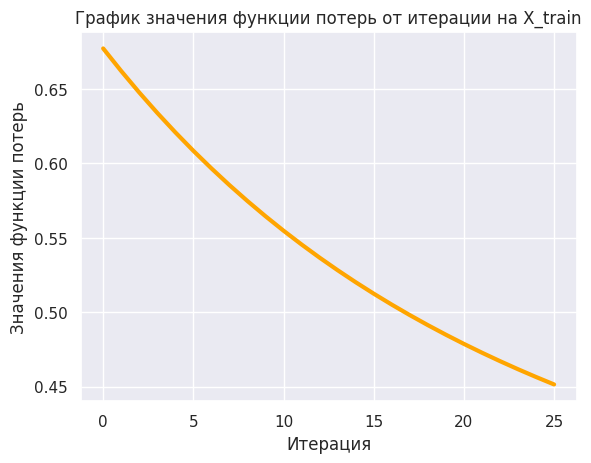

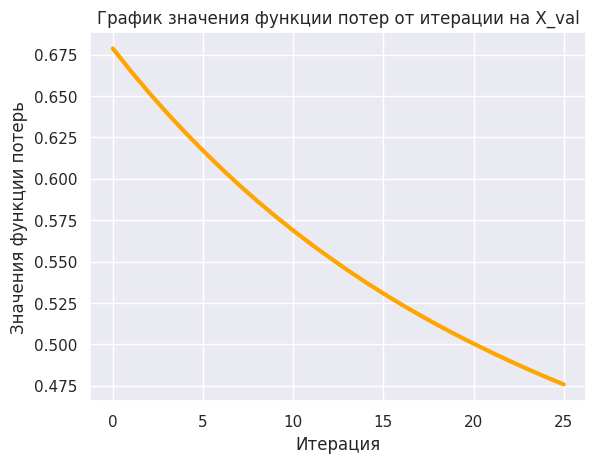

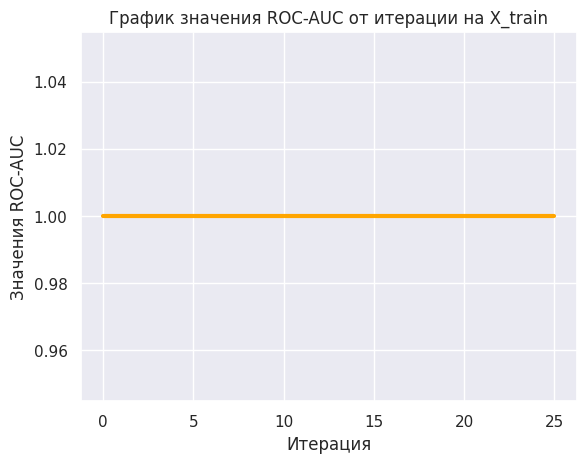

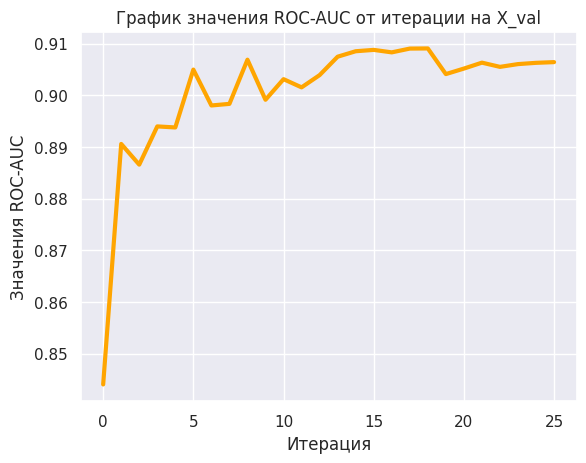

Train ROC-AUC 0.9998
Valid ROC-AUC 0.9064
Test ROC-AUC 0.9027


In [53]:
# *𖣂♱𖠰𖣂↟*𖠰ᨒ↟*𖥧˚
boosting = Boosting(n_estimators=100, early_stopping_rounds=7, eval_set=(X_valid, y_valid))

boosting.fit(X_train, y_train, plot=True)

print(f'Train ROC-AUC {boosting.score(X_train, y_train):.4f}')
print(f'Valid ROC-AUC {boosting.score(X_valid, y_valid):.4f}')
print(f'Test ROC-AUC {boosting.score(X_test, y_test):.4f}')

Да, ROC-AUC на валидационной и тестовой выборках стал похуже, чем без ограничения параметра early_stopping_rounds.

### 2.2. Бутстрап (0.5 балла)
Как известно, при обучении базовых алгоритмов в беггинге, используется бутстрапированная выборка. Звучит хайпово, почему бы не попробовать сделать то же самое в бустинге?

| <font color='lightblue'>XGBoost</font> | <font color='lightgreen'>LightGBM</font> | <font color='palegoldenrod'>CatBoost</font> |
| --- | --- | --- |
| `subsample`, - | `subsample`, `bagging`| `subsample`, `bootstrap_type`|

Вам нужно реализовать параметры:
- `subsample: float | int = 0.6` - доля или число объектов, на которой будет обучаться базовая модель (какую часть составляет бутстрапная выборка от исходной обучающей). Соответствует бутстрапу типа `Bernoulli`. Каждый объект либо входит в подвыборку, либо нет
- `bagging_temperature: float | int = 1.0` - веса объектов, которые попадают в выборку. Соответствует бутстрапу типа `Bayesian`. Каждый объект имеет определенный вес $t$, на который впоследствии домножается по формуле $w = -log(X^t)$, где $X \sim {U[0, 1]}$, после чего попадает в выборку. Таким образом можно сделать симуляцию повторений
- `bootstrap_type: str | None = 'Bernoulli'` - тип бутстрапа

<font color='plum'>**Вопрос:** как бутстрап может помочь в обучении с точки зрения смещения, разброса и вообще?</font>

<font color='plum'>**Ответ:** по bias будет улучшение, так как из-за бутстраппирования каждая базовая модель использует только часть данных, следовательно, хорошо изучивает закономерности на них, что улучшает обобщающую способность ансамблированной модели, а следовательно и снижает bias. Что касается variance, то благодаря бутстраппированию каждая базовая модель видит только часть данных и поэтому при небольшом изменении обучающей выборки ансамблированная модель будет выдавать более стабильный результат (variance уменьшится). </font>

In [54]:
from __future__ import annotations
import matplotlib.pyplot as plt
from collections import defaultdict

import numpy as np
from sklearn.metrics import roc_auc_score
from sklearn.tree import DecisionTreeRegressor

from typing import Optional
from typing import Tuple


def score(clf, x, y):
    return roc_auc_score(y, clf.predict_proba(x)[:, 1])


class Boosting:

    def __init__(
        self,
        base_model_class = DecisionTreeRegressor,
        base_model_params: Optional[dict] = None,
        n_estimators: int = 10,
        learning_rate: float = 0.1,
        early_stopping_rounds: int | None = 10,
        eval_set: Tuple[np.ndarray, np.ndarray] | None = None,
        subsample: float | int = 0.6,
        bagging_temperature: float | int = 1.0,
        bootstrap_type: str | None = 'Bernoulli'
    ):
        self.base_model_class = base_model_class
        self.base_model_params: dict = {} if base_model_params is None else base_model_params

        self.n_estimators: int = n_estimators

        self.models: list = []
        self.gammas: list = []

        self.learning_rate: float = learning_rate

        self.early_stopping_rounds: int = early_stopping_rounds
        self.eval_set: Tuple[np.ndarray, np.ndarray] | None = eval_set

        self.subsample: float | int = subsample
        self.bagging_temperature: float | int = bagging_temperature
        self.bootstrap_type: str | None = bootstrap_type


        self.history = defaultdict(list) # {"train_roc_auc": [], "train_loss": [], ...}

        self.sigmoid = lambda x: 1 / (1 + np.exp(-x))
        self.loss_fn = lambda y, z: -np.log(self.sigmoid(y * z)).mean()
        self.loss_derivative = lambda y, z: - y / (1 + np.exp(y * z)) # Исправьте формулу на правильную.


    def partial_fit(self, X, y):
        model = self.base_model_class(**self.base_model_params)
        if self.bootstrap_type is None:
          model.fit(X, y)
        elif self.bootstrap_type == 'Bernoulli':
          if isinstance(self.subsample, int):
            indexes_rand = np.random.choice(X.shape[0], size=self.subsample, replace=False)
          elif isinstance(self.subsample, float):
            indexes_rand = np.random.choice(X.shape[0], size=int(self.subsample * X.shape[0]), replace=False)
          model.fit(X[indexes_rand], y[indexes_rand])
        elif self.bootstrap_type == 'Bayesian':
          weights = (-np.log(np.random.uniform(0, 1, X.shape[0]))) ** self.bagging_temperature
          # будем проверять, не типа ли sparse_matrix у нас X
          if hasattr(X, "multiply"):
            X = X.multiply(weights[:, np.newaxis]) # weights[:, np.newaxis] переделывает shape w в (X.shape[0], 1)
          else:
            X = X * weights[:, np.newaxis]
          model.fit(X, y * weights)
        self.models.append(model)
        return model

    def fit(self, X_train, y_train, X_val=None, y_val=None, plot=False):
        """
        :param X_train: features array (train set)
        :param y_train: targets array (train set)
        :param X_val: features array (eval set)
        :param y_val: targets array (eval set)
        :param plot: bool
        """
        train_predictions = np.zeros(y_train.shape[0])

        if self.eval_set is not None:
          X_val = self.eval_set[0]
          y_val = self.eval_set[1]
          valid_predictions = np.zeros(y_val.shape[0])
          abs_of_imp_count = 0 # считаю, что early_stopping_rounds всегда больше 0 (как минимум 1)
          best_qual = -1


        for i in range(self.n_estimators):
            model = self.partial_fit(X_train, - self.loss_derivative(y_train, train_predictions))
            new_preds = model.predict(X_train)
            gamma = self.find_optimal_gamma(y_train, train_predictions, new_preds)
            self.gammas.append(gamma)
            train_predictions = train_predictions + gamma * self.learning_rate * new_preds
            self.history["train_loss"].append(self.loss_fn(y_train, train_predictions))
            self.history["train_roc_auc"].append(self.score(X_train, y_train))

            if self.eval_set is not None:
              new_valid_preds = model.predict(X_val)
              valid_predictions = valid_predictions + gamma * self.learning_rate * new_valid_preds
              self.history["valid_loss"].append(self.loss_fn(y_val, valid_predictions))
              self.history["valid_roc_auc"].append(self.score(X_val, y_val))

              if self.history["valid_roc_auc"][-1] < best_qual:
                abs_of_imp_count += 1

              else:
                abs_of_imp_count = 0
                best_qual = self.history["valid_roc_auc"][-1]

              if abs_of_imp_count == self.early_stopping_rounds:
                break

        if plot:
            self.plot_history()

    def predict_proba(self, X):
        total_predictions = np.zeros(X.shape[0])

        for i in range(len(self.models)):
          new_predicts = self.models[i].predict(X)
          gamma = self.gammas[i]
          total_predictions = total_predictions + gamma * self.learning_rate * new_predicts
          prob_1 = self.sigmoid(total_predictions)
          prob_0 = 1 - prob_1
          probs = np.column_stack((prob_0, prob_1))
        return probs

    def find_optimal_gamma(self, y, old_predictions, new_predictions) -> float:
        gammas = np.linspace(start=0, stop=1, num=100)
        losses = [self.loss_fn(y, old_predictions + gamma * new_predictions) for gamma in gammas]
        return gammas[np.argmin(losses)]

    def score(self, X, y):
        return score(self, X, y)

    def plot_history(self):
        """
        :param X: features array (any set)
        :param y: targets array (any set)
        """
        # подсчитывал в fit истории потерь или метрик для X_train, X_val (спрашивал у Danil Ivanov, он разрешил так делать), поэтому параметры X, y не нужны
        #if "train_loss" in self.history:
        x = range(len(self.history["train_loss"]))
        y = self.history["train_loss"]
        plt.plot(x, y, color='orange', linewidth=3)
        plt.xlabel('Итерация')
        plt.ylabel('Значения функции потерь')
        plt.title('График значения функции потерь от итерации на X_train')
        plt.show()

        if "valid_loss" in self.history:
          x = range(len(self.history["valid_loss"]))
          y = self.history["valid_loss"]
          plt.plot(x, y, color='orange', linewidth=3)
          plt.xlabel('Итерация')
          plt.ylabel('Значения функции потерь')
          plt.title('График значения функции потер от итерации на X_val')
          plt.show()

        #if "train_roc_auc" in self.history:
        x = range(len(self.history["train_roc_auc"]))
        y = self.history["train_roc_auc"]
        plt.plot(x, y, color='orange', linewidth=3)
        plt.xlabel('Итерация')
        plt.ylabel('Значения ROC-AUC')
        plt.title('График значения ROC-AUC от итерации на X_train')
        plt.show()

        if "valid_roc_auc" in self.history:
          x = range(len(self.history["valid_roc_auc"]))
          y = self.history["valid_roc_auc"]
          plt.plot(x, y, color='orange', linewidth=3)
          plt.xlabel('Итерация')
          plt.ylabel('Значения ROC-AUC')
          plt.title('График значения ROC-AUC от итерации на X_val')
          plt.show()

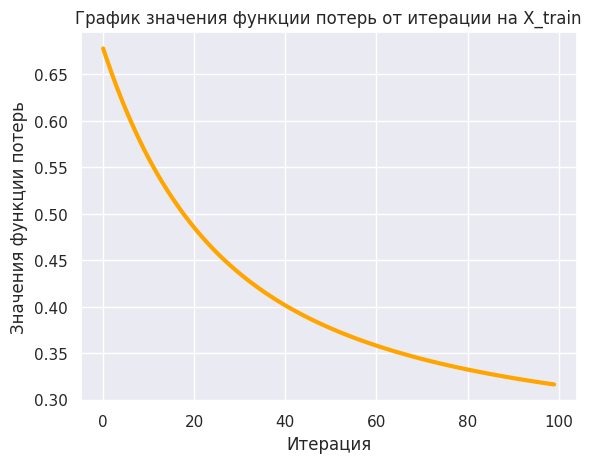

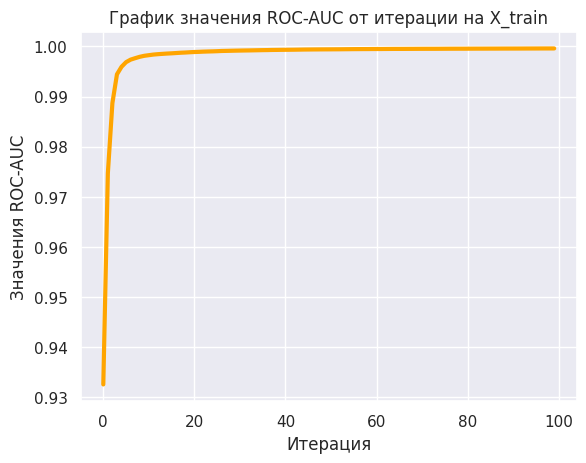

Train ROC-AUC 0.9996
Valid ROC-AUC 0.9182
Test ROC-AUC 0.9228


In [55]:
# *𖣂♱𖠰𖣂↟*𖠰ᨒ↟*𖥧˚
boosting = Boosting(n_estimators=100, subsample=0.5, bootstrap_type='Bernoulli')

boosting.fit(X_train, y_train, plot=True)

print(f'Train ROC-AUC {boosting.score(X_train, y_train):.4f}')
print(f'Valid ROC-AUC {boosting.score(X_valid, y_valid):.4f}')
print(f'Test ROC-AUC {boosting.score(X_test, y_test):.4f}')

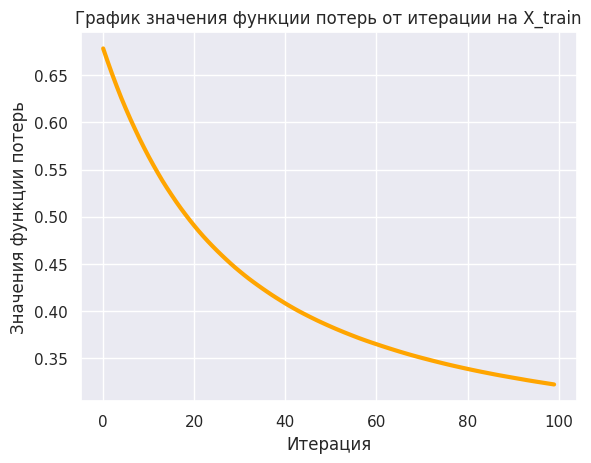

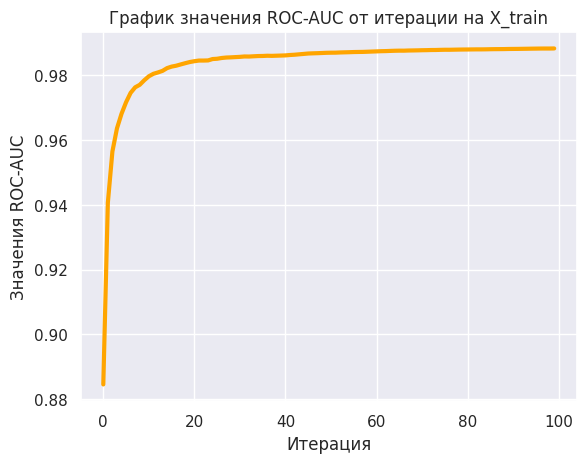

Train ROC-AUC 0.9883
Valid ROC-AUC 0.9300
Test ROC-AUC 0.9310


In [56]:
boosting = Boosting(n_estimators=100, bagging_temperature=0.2, bootstrap_type='Bayesian')

boosting.fit(X_train, y_train, plot=True)

print(f'Train ROC-AUC {boosting.score(X_train, y_train):.4f}')
print(f'Valid ROC-AUC {boosting.score(X_valid, y_valid):.4f}')
print(f'Test ROC-AUC {boosting.score(X_test, y_test):.4f}')

### Бонус. GOSS (0.5 балла)

Заметим, что во время обучения не все объекты одинаково важны. Один из вариантов это исправить - ввести какие-то веса на объекты, однако можно пойти чуть хитрее. В <font color='lightgreen'>LightGBM</font> придумали подход [Gradient-based One-side Sampling](https://www.microsoft.com/en-us/research/wp-content/uploads/2017/11/lightgbm.pdf)

Давайте оценивать важность объектов в отдельный момент обучения нового дерева. Будем считать, какой антиградиент привносит каждый объект. Далее разобъем градиенты на 2 группы. Объекты с большими градиентами берутся все, с маленькими - только часть, по аналогии с бутстрапом, с отрицательными - выкидываются. И не забываем домножить на фактор, чтобы учесть выкинутые объекты. Подробнее в статье

| <font color='lightblue'>XGBoost</font> | <font color='lightgreen'>LightGBM</font> | <font color='palegoldenrod'>CatBoost</font> |
| --- | --- | --- |
| - | `bagging=goss`| `bootstrap_type=MVS`|

Параметры, которые нужно сделать:

- `goss: bool | None = True` - GOSS бустинг или нет
- `goss_k: float | int = 0.2` - доля объектов, градиенты которых будем считать большими. Все остальное - маленькими
- `subsample: float | int = 0.3` - параметры сэмплинга для маленьких градиентов из пункта 2.1

Этот бонус делал в самом конце, поэтому у него тут свой бустинг, а остальные бустинги без GOSSа.

In [72]:
from __future__ import annotations
import matplotlib.pyplot as plt
from collections import defaultdict

import numpy as np
from sklearn.metrics import roc_auc_score
from sklearn.tree import DecisionTreeRegressor

from typing import Optional
from typing import Tuple


def score(clf, x, y):
    return roc_auc_score(y, clf.predict_proba(x)[:, 1])


class Boosting:

    def __init__(
        self,
        base_model_class = DecisionTreeRegressor,
        base_model_params: Optional[dict] = None,
        n_estimators: int = 10,
        learning_rate: float = 0.1,
        early_stopping_rounds: int | None = 10,
        eval_set: Tuple[np.ndarray, np.ndarray] | None = None,
        subsample: float | int = 0.3,
        bagging_temperature: float | int = 1.0,
        bootstrap_type: str | None = 'Bernoulli',
        goss: bool | None = True,
        goss_k: float | int = 0.2
    ):
        self.base_model_class = base_model_class
        self.base_model_params: dict = {} if base_model_params is None else base_model_params

        self.n_estimators: int = n_estimators

        self.models: list = []
        self.gammas: list = []

        self.learning_rate: float = learning_rate

        self.early_stopping_rounds: int = early_stopping_rounds
        self.eval_set: Tuple[np.ndarray, np.ndarray] | None = eval_set

        self.subsample: float | int = subsample
        self.bagging_temperature: float | int = bagging_temperature
        self.bootstrap_type: str | None = bootstrap_type

        self.goss: bool | None = goss
        self.goss_k: float | int = goss_k


        self.history = defaultdict(list) # {"train_roc_auc": [], "train_loss": [], ...}

        self.sigmoid = lambda x: 1 / (1 + np.exp(-x))
        self.loss_fn = lambda y, z: -np.log(self.sigmoid(y * z)).mean()
        self.loss_derivative = lambda y, z: - y / (1 + np.exp(y * z)) # Исправьте формулу на правильную.


    def partial_fit(self, X, y):
        model = self.base_model_class(**self.base_model_params)
        if self.goss is not None:
          if self.goss:
            grads = np.abs(y)
            if isinstance(self.goss_k, float):
              top_quant = int(self.goss_k * len(grads))
            elif isinstance(self.goss_k, int):
              top_quant = min(self.goss_k, len(grads))

            big_grads_ind = np.where(grads >= np.partition(grads, -top_quant)[-top_quant])
            small_grads_ind = np.where(grads < np.partition(grads, -top_quant)[-top_quant])
            if (isinstance(self.subsample, float) and self.subsample < 1.0) or (isinstance(self.subsample, int) and self.subsample < len(small_grads_ind)):
              if isinstance(self.subsample, float):
                small_grads_ind_samp = np.random.choice(small_grads_ind[0], size=int(len(small_grads_ind) * self.subsample), replace=False)
                factor = (1.0 - self.subsample) / self.subsample

              elif isinstance(self.subsample, int):
                small_grads_ind_samp = np.random.choice(small_grads_ind[0], size=min(len(small_grads_ind), self.subsample), replace=False) # вдруг количество объектов с маленькими градиентами, меньше, чем количество, которое надо сэмплировать из них, поэтому min
                factor = (len(small_grads_ind) - self.subsample) / self.subsample

            elif (isinstance(self.subsample, float) and self.subsample == 1.0) or (isinstance(self.subsample, int) and self.subsample >= len(small_grads_ind)):
                small_grads_ind_samp = small_grads_ind[0]
                factor = 1.0
            necess_ind = np.concatenate([big_grads_ind[0], small_grads_ind_samp])
            weights = np.ones(len(necess_ind))
            small_grads_necess = np.isin(necess_ind, small_grads_ind_samp)
            weights[small_grads_necess] = weights[small_grads_necess] * factor
            model.fit(X[necess_ind], y[necess_ind], sample_weight=weights)

        elif self.bootstrap_type == 'Bernoulli':
          if isinstance(self.subsample, int):
            indexes_rand = np.random.choice(X.shape[0], size=self.subsample, replace=False)
          elif isinstance(self.subsample, float):
            indexes_rand = np.random.choice(X.shape[0], size=int(self.subsample * X.shape[0]), replace=False)
          model.fit(X[indexes_rand], y[indexes_rand])
        elif self.bootstrap_type == 'Bayesian':
          weights = (-np.log(np.random.uniform(0, 1, X.shape[0]))) ** self.bagging_temperature
          # будем проверять, не типа ли sparse_matrix у нас X
          if hasattr(X, "multiply"):
            X = X.multiply(weights[:, np.newaxis]) # weights[:, np.newaxis] переделывает shape w в (X.shape[0], 1)
          else:
            X = X * weights[:, np.newaxis]
          model.fit(X, y * weights)
        else:
          model.fit(X, y)
        self.models.append(model)
        return model

    def fit(self, X_train, y_train, X_val=None, y_val=None, plot=False):
        """
        :param X_train: features array (train set)
        :param y_train: targets array (train set)
        :param X_val: features array (eval set)
        :param y_val: targets array (eval set)
        :param plot: bool
        """
        train_predictions = np.zeros(y_train.shape[0])

        if self.eval_set is not None:
          X_val = self.eval_set[0]
          y_val = self.eval_set[1]
          valid_predictions = np.zeros(y_val.shape[0])
          abs_of_imp_count = 0 # считаю, что early_stopping_rounds всегда больше 0 (как минимум 1)
          best_qual = -1


        for i in range(self.n_estimators):
            model = self.partial_fit(X_train, - self.loss_derivative(y_train, train_predictions))
            new_preds = model.predict(X_train)
            gamma = self.find_optimal_gamma(y_train, train_predictions, new_preds)
            self.gammas.append(gamma)
            train_predictions = train_predictions + gamma * self.learning_rate * new_preds
            self.history["train_loss"].append(self.loss_fn(y_train, train_predictions))
            self.history["train_roc_auc"].append(self.score(X_train, y_train))

            if self.eval_set is not None:
              new_valid_preds = model.predict(X_val)
              valid_predictions = valid_predictions + gamma * self.learning_rate * new_valid_preds
              self.history["valid_loss"].append(self.loss_fn(y_val, valid_predictions))
              self.history["valid_roc_auc"].append(self.score(X_val, y_val))

              if self.history["valid_roc_auc"][-1] < best_qual:
                abs_of_imp_count += 1

              else:
                abs_of_imp_count = 0
                best_qual = self.history["valid_roc_auc"][-1]

              if abs_of_imp_count == self.early_stopping_rounds:
                break

        if plot:
            self.plot_history()

    def predict_proba(self, X):
        total_predictions = np.zeros(X.shape[0])

        for i in range(len(self.models)):
          new_predicts = self.models[i].predict(X)
          gamma = self.gammas[i]
          total_predictions = total_predictions + gamma * self.learning_rate * new_predicts
          prob_1 = self.sigmoid(total_predictions)
          prob_0 = 1 - prob_1
          probs = np.column_stack((prob_0, prob_1))
        return probs

    def find_optimal_gamma(self, y, old_predictions, new_predictions) -> float:
        gammas = np.linspace(start=0, stop=1, num=100)
        losses = [self.loss_fn(y, old_predictions + gamma * new_predictions) for gamma in gammas]
        return gammas[np.argmin(losses)]

    def score(self, X, y):
        return score(self, X, y)

    def plot_history(self):
        """
        :param X: features array (any set)
        :param y: targets array (any set)
        """
        # подсчитывал в fit истории потерь или метрик для X_train, X_val (спрашивал у Danil Ivanov, он разрешил так делать), поэтому параметры X, y не нужны
        #if "train_loss" in self.history:
        x = range(len(self.history["train_loss"]))
        y = self.history["train_loss"]
        plt.plot(x, y, color='orange', linewidth=3)
        plt.xlabel('Итерация')
        plt.ylabel('Значения функции потерь')
        plt.title('График значения функции потерь от итерации на X_train')
        plt.show()

        if "valid_loss" in self.history:
          x = range(len(self.history["valid_loss"]))
          y = self.history["valid_loss"]
          plt.plot(x, y, color='orange', linewidth=3)
          plt.xlabel('Итерация')
          plt.ylabel('Значения функции потерь')
          plt.title('График значения функции потер от итерации на X_val')
          plt.show()

        #if "train_roc_auc" in self.history:
        x = range(len(self.history["train_roc_auc"]))
        y = self.history["train_roc_auc"]
        plt.plot(x, y, color='orange', linewidth=3)
        plt.xlabel('Итерация')
        plt.ylabel('Значения ROC-AUC')
        plt.title('График значения ROC-AUC от итерации на X_train')
        plt.show()

        if "valid_roc_auc" in self.history:
          x = range(len(self.history["valid_roc_auc"]))
          y = self.history["valid_roc_auc"]
          plt.plot(x, y, color='orange', linewidth=3)
          plt.xlabel('Итерация')
          plt.ylabel('Значения ROC-AUC')
          plt.title('График значения ROC-AUC от итерации на X_val')
          plt.show()

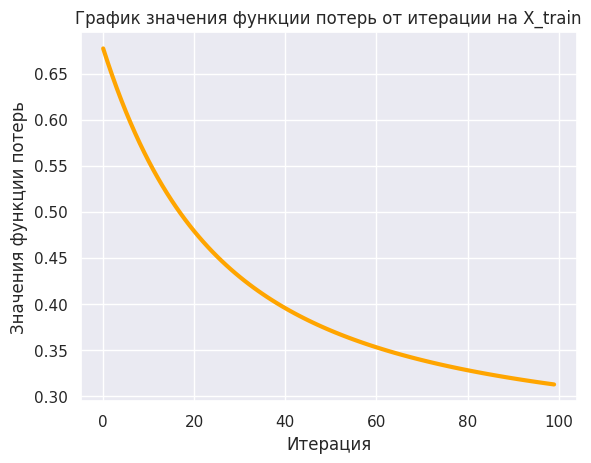

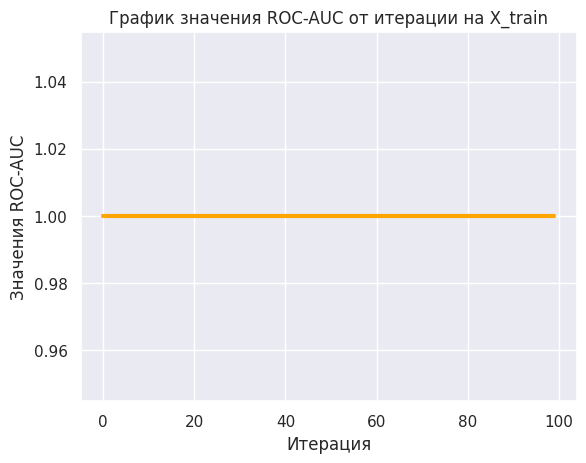

Train ROC-AUC 0.9998
Valid ROC-AUC 0.9075
Test ROC-AUC 0.9050


In [73]:
# *𖣂♱𖠰𖣂↟*𖠰ᨒ↟*𖥧˚
boosting = Boosting(n_estimators=100, goss=True, goss_k=0.3, subsample=1.0)

boosting.fit(X_train, y_train, plot=True)

print(f'Train ROC-AUC {boosting.score(X_train, y_train):.4f}')
print(f'Valid ROC-AUC {boosting.score(X_valid, y_valid):.4f}')
print(f'Test ROC-AUC {boosting.score(X_test, y_test):.4f}')

### 2.3. Работа с признаками (1 балл)

1. Помимо выбора случайных объектов, есть идея выбирать случайное подмножество признаков, заложенная в Random Forest. Мотивация это делать точно та же самая, что и в бутстрапировании, за это будет отвечать `rsm`

2. С другой стороны, вместо того, чтобы выкидывать признаки, можно попробовать проредить их множество значений, применив бинаризацию. В идеале это стоит делать с датасетом до обучения модели, но не обязательно, можно, например, на этапе `fit`, а в `partial_fit` приходит уже квантизованный датасет. Для этого существует множество алгоритмов, мы предлагаем сделать два наиболее простых:

- $\text{Uniform}$. Значения признака $[\min f_i, \max f_i]$ отображаются в `nbins` отрезков одинаковой длины, которые полностью покрывают интервал
- $\text{Quantile}$. Тот же самый отрезок сортируется и бьется на `nbins` квантилей от 0 до 1

| <font color='lightblue'>XGBoost</font> | <font color='lightgreen'>LightGBM</font> | <font color='palegoldenrod'>CatBoost</font> |
| --- | --- | --- |
| `colsample_bytree`, `tree_method` | `colsample_bytree`, `max_bin`| `rsm`, `quantize(...)`|

Нужно добавить параметры:
- `rsm: float | int = 0.6` - доля или число признаков, участвующих в обучении модели. Каждый признак либо входит, либо не входит в пул, на котором обучается базовый алгоритм, по аналогии с бутстрапом Бернулли
- `quantization_type: str | None = 'Uniform'` - тип квантизации, если она есть
- `nbins: int = 255` - число бинов для квантизации, можно оставить дефолтное значение. Игнорируем, если тип квантизации не указан

<font color='plum'>**Вопрос**: как квантизация поможет в обработке выбросов и нанов?</font>

<font color='plum'>**Ответ**: ... </font>

<font color='plum'>**Вопрос**: можно ли просто заполнить наны каким-то числом? Имеет ли значение, что это за число (-1, -100, -1e32)?</font>

<font color='plum'>**Ответ**: ... </font>

### Бонус. Квантизация (1 балл)

В текущих имплементациях бустинга используются более сложные методы квантизации. К сожалению, способы выше страдают либо от неравноправности бинов - в каких-то объектов больше, в каких-то меньше, либо от того, что целевая переменная от бинов зависит опосредованно. Предлагается это исправить следующими способами:

1. $\text{MinEntropy}$. Это [один из методов](https://catboost.ai/docs/en/concepts/quantization), который используется для бинаризации в <font color='palegoldenrod'>CatBoost</font>, остальные на него очень похожи. Будем жадно набирать бины так, чтобы энтропия объектов внутри ($\sum_{i \in \text{bin}} x_i\log(x_i)$) была как можно меньше. Сделать такое разбиение руками непросто, но вам эта задача должна что-то напоминать
   
2. $\text{PiecewiseEncoding}$. Это относительно свежий метод для [табличных трансформеров](https://arxiv.org/pdf/2203.05556). Суть заключается в том, что бины для квантизации будем брать не с потолка, а именно те, что нужны для разбиения таргета. (В статье делается кодирование в вектор длины $T$, где $T$ число бинов, в нашем случае это излишне, бинов можно оставить столько же, но взять лмшь закодированную по формуле часть)

| <font color='lightblue'>XGBoost</font> | <font color='lightgreen'>LightGBM</font> | <font color='palegoldenrod'>CatBoost</font> |
| --- | --- | --- |
| - | - | `feature_border_type="MinEntropy"` |

Нужно добавить опцию:

- `quantization_type: str | None = 'MinEntropy'` - какую квантизацию используем

Реализуйте оба способа подсчета (или один, но тогда балл неполный) и сравните, удалось ли улучшить качество?

In [ ]:
# *𖣂♱𖠰𖣂↟*𖠰ᨒ↟*𖥧˚

### 2.4. Важность признаков (0.5 балла)

Поскольку наша базовая модель - это дерево из `sklearn`, мы можем вычислить важность признака отдельно для каждого дерева и усреднить (воспользуйтесь `feature_importances_` у `DecisionTreeRegressor`), после этого нормировать значения, чтобы они суммировались в единицу (обратите внимание, что они должны быть неотрицательными - иначе вы что-то сделали не так). Разумеется, способ не единственный, если хочется, посмотрите в документации

| <font color='lightblue'>XGBoost</font> | <font color='lightgreen'>LightGBM</font> | <font color='palegoldenrod'>CatBoost</font> |
| --- | --- | --- |
| `model.get_score()` | `lightgbm.importance()` | `model.get_feature_importance()` |

Допишите в вашей реализации бустинга атрибут `feature_importances_` чтобы она возвращала описанные выше важности признаков.

In [ ]:
# *𖣂♱𖠰𖣂↟*𖠰ᨒ↟*𖥧˚

Покажите, какие признаки оказались самыми важными

In [ ]:
# *𖣂♱𖠰𖣂↟*𖠰ᨒ↟*𖥧˚

### Бонус. DART (1.5 балла)

Ранее мы обсуждали, что каждый базовый алгоритм пытается исправить ошибки всего предыдущего ансамбля. Из-за этого возникает неравноправие - каждая новая модель вносит все меньший и меньший вклад. Уверенные обучатели нейросетей знают, что это может привести к переобучению. Но выход есть, и выход этот [DART](https://arxiv.org/pdf/1505.01866)!

В DL есть такой вид регуляризации, как dropout, когда некоторые узлы нейросети со случайным шансом отключаются. Можно попробовать обобщить этот подход на случай бустингов и случайно выкидывать деревья из композиции во время обучения

1. Выбираем, какие деревья убрать. При подсчете антиградиента берем не весь ансамбль, а только ту часть, что осталась
2. Домножаем выходы дерева на $1/k$, где $k$ - число удаленных деревьев, чтобы учесть тот факт, что ансамбль был не весь. Тогда вклад отдельного дерева будет не настолько большим
3. Домножаем выкинутые деревья на $k/(k+1)$, чтобы масштабы выходов примерно совпадали

| <font color='lightblue'>XGBoost</font> | <font color='lightgreen'>LightGBM</font> | <font color='palegoldenrod'>CatBoost</font> |
| --- | --- | --- |
| `XGBClassifier(booster="dart")` | `LGBMClassifier(boosting_type="dart")` | - |

Параметры, которые нужно добавить:

- `dart: bool | None = False` - DART бустинг или нет
- `dropout_rate: int | float = 0.1` - доля деревьев, которую выкидываем во время обучения DART

In [ ]:
# *𖣂♱𖠰𖣂↟*𖠰ᨒ↟*𖥧˚

------

## Задание 3. Оптимизация (3.5 балла + 0.5 бонус)

Теперь давайте подумаем, как же правильно применять бустинги. Нас интересует: какие бустинги вообще бывают, как их правильно тюнить, и как интерпретировать

Оптимизация моделей с большим числом гиперпараметров это сложное дело. Нетрудно догадаться, что в случае, когда параметров $m$, сложность перебора в самом худшем случае будет порядка $n^m$. У бустингов, хотя на самом деле не только, эта проблема стоит особенно остро. Подумаем, как это делать умнее

### 3.1. Знакомство с optuna (1 балл)

Для эффективного подбора гиперпараметров существует несколько решений, основанных на байесовской оптимизации. В этом задании предлагается познакомиться с библиотекой [optuna](https://optuna.org/), которая делает перебор гиперпараметров легким и приятным, а также сохраняет всю историю экспериментов в одно место за вас

Подберите на валидации оптимальные значения следующих гиперпараметров для вашей реализации бустинга:
- `max_depth`
- `n_estimators`
- `learning_rate`
- любые другие параметры, которые вам понравились

Заметим, что оптуна это крайне гибкая библиотека, в которой можно реализовать абсолютно любую логику, которую пожелаете. За вас там есть лишь выбор модели. Чтобы не плодить несколько `objective`, можно слегка менять тело функции, например, добавить опциональные параметры, но шаблоном пользоваться не обязательно, как обычно

Подберите диапазон параметров самостоятельно, не забывайте фиксировать сид (нет, его не нужно перебирать). Сохраните и покажите оптимальный набор параметров. Сравните графики функций потерь для оптимального и дефолтного бустингов. Покажите, какие параметры дали наибольший прирост (для этого придется почитать документацию оптуны)

In [60]:
from __future__ import annotations
import matplotlib.pyplot as plt
from collections import defaultdict

import numpy as np
from sklearn.metrics import roc_auc_score
from sklearn.tree import DecisionTreeRegressor

from typing import Optional
from typing import Tuple


def score(clf, x, y):
    return roc_auc_score(y, clf.predict_proba(x)[:, 1])


class Boosting:

    def __init__(
        self,
        base_model_class = DecisionTreeRegressor,
        base_model_params: Optional[dict] = None,
        n_estimators: int = 100,
        learning_rate: float = 0.1,
        early_stopping_rounds: int | None = 10,
        eval_set: Tuple[np.ndarray, np.ndarray] | None = None,
        subsample: float | int = 0.6,
        bagging_temperature: float | int = 1.0,
        bootstrap_type: str | None = 'Bernoulli'
    ):
        self.base_model_class = base_model_class
        self.base_model_params: dict = {} if base_model_params is None else base_model_params

        self.n_estimators: int = n_estimators

        self.models: list = []
        self.gammas: list = []

        self.learning_rate: float = learning_rate

        self.early_stopping_rounds: int = early_stopping_rounds
        self.eval_set: Tuple[np.ndarray, np.ndarray] | None = eval_set

        self.subsample: float | int = subsample
        self.bagging_temperature: float | int = bagging_temperature
        self.bootstrap_type: str | None = bootstrap_type


        self.history = defaultdict(list) # {"train_roc_auc": [], "train_loss": [], ...}

        self.sigmoid = lambda x: 1 / (1 + np.exp(-x))
        self.loss_fn = lambda y, z: -np.log(self.sigmoid(y * z)).mean()
        self.loss_derivative = lambda y, z: - y / (1 + np.exp(y * z)) # Исправьте формулу на правильную.


    def partial_fit(self, X, y):
        model = self.base_model_class(**self.base_model_params)
        if self.bootstrap_type is None:
          model.fit(X, y)
        elif self.bootstrap_type == 'Bernoulli':
          if isinstance(self.subsample, int):
            indexes_rand = np.random.choice(X.shape[0], size=self.subsample, replace=False)
          elif isinstance(self.subsample, float):
            indexes_rand = np.random.choice(X.shape[0], size=int(self.subsample * X.shape[0]), replace=False)
          model.fit(X[indexes_rand], y[indexes_rand])
        elif self.bootstrap_type == 'Bayesian':
          weights = (-np.log(np.random.uniform(0, 1, X.shape[0]))) ** self.bagging_temperature
          # будем проверять, не типа ли sparse_matrix у нас X
          if hasattr(X, "multiply"):
            X = X.multiply(weights[:, np.newaxis]) # weights[:, np.newaxis] переделывает shape w в (X.shape[0], 1)
          else:
            X = X * weights[:, np.newaxis]
          model.fit(X, y * weights)
        self.models.append(model)
        return model

    def fit(self, X_train, y_train, X_val=None, y_val=None, plot=False):
        """
        :param X_train: features array (train set)
        :param y_train: targets array (train set)
        :param X_val: features array (eval set)
        :param y_val: targets array (eval set)
        :param plot: bool
        """
        train_predictions = np.zeros(y_train.shape[0])

        if self.eval_set is not None:
          X_val = self.eval_set[0]
          y_val = self.eval_set[1]
          valid_predictions = np.zeros(y_val.shape[0])
          abs_of_imp_count = 0 # считаю, что early_stopping_rounds всегда больше 0 (как минимум 1)
          best_qual = -1


        for i in range(self.n_estimators):
            model = self.partial_fit(X_train, - self.loss_derivative(y_train, train_predictions))
            new_preds = model.predict(X_train)
            gamma = self.find_optimal_gamma(y_train, train_predictions, new_preds)
            self.gammas.append(gamma)
            train_predictions = train_predictions + gamma * self.learning_rate * new_preds
            self.history["train_loss"].append(self.loss_fn(y_train, train_predictions))
            self.history["train_roc_auc"].append(self.score(X_train, y_train))

            if self.eval_set is not None:
              new_valid_preds = model.predict(X_val)
              valid_predictions = valid_predictions + gamma * self.learning_rate * new_valid_preds
              self.history["valid_loss"].append(self.loss_fn(y_val, valid_predictions))
              self.history["valid_roc_auc"].append(self.score(X_val, y_val))

              if self.history["valid_roc_auc"][-1] < best_qual:
                abs_of_imp_count += 1

              else:
                abs_of_imp_count = 0
                best_qual = self.history["valid_roc_auc"][-1]

              if abs_of_imp_count == self.early_stopping_rounds:
                break

        if plot:
            self.plot_history()

    def predict_proba(self, X):
        total_predictions = np.zeros(X.shape[0])

        for i in range(len(self.models)):
          new_predicts = self.models[i].predict(X)
          gamma = self.gammas[i]
          total_predictions = total_predictions + gamma * self.learning_rate * new_predicts
          prob_1 = self.sigmoid(total_predictions)
          prob_0 = 1 - prob_1
          probs = np.column_stack((prob_0, prob_1))
        return probs

    def find_optimal_gamma(self, y, old_predictions, new_predictions) -> float:
        gammas = np.linspace(start=0, stop=1, num=100)
        losses = [self.loss_fn(y, old_predictions + gamma * new_predictions) for gamma in gammas]
        return gammas[np.argmin(losses)]

    def score(self, X, y):
        return score(self, X, y)

    def plot_history(self):
        """
        :param X: features array (any set)
        :param y: targets array (any set)
        """
        # подсчитывал в fit истории потерь или метрик для X_train, X_val (спрашивал у Danil Ivanov, он разрешил так делать), поэтому параметры X, y не нужны
        #if "train_loss" in self.history:
        x = range(len(self.history["train_loss"]))
        y = self.history["train_loss"]
        plt.plot(x, y, color='orange', linewidth=3)
        plt.xlabel('Итерация')
        plt.ylabel('Значения функции потерь')
        plt.title('График значения функции потерь от итерации на X_train')
        plt.show()

        if "valid_loss" in self.history:
          x = range(len(self.history["valid_loss"]))
          y = self.history["valid_loss"]
          plt.plot(x, y, color='orange', linewidth=3)
          plt.xlabel('Итерация')
          plt.ylabel('Значения функции потерь')
          plt.title('График значения функции потер от итерации на X_val')
          plt.show()

        #if "train_roc_auc" in self.history:
        x = range(len(self.history["train_roc_auc"]))
        y = self.history["train_roc_auc"]
        plt.plot(x, y, color='orange', linewidth=3)
        plt.xlabel('Итерация')
        plt.ylabel('Значения ROC-AUC')
        plt.title('График значения ROC-AUC от итерации на X_train')
        plt.show()

        if "valid_roc_auc" in self.history:
          x = range(len(self.history["valid_roc_auc"]))
          y = self.history["valid_roc_auc"]
          plt.plot(x, y, color='orange', linewidth=3)
          plt.xlabel('Итерация')
          plt.ylabel('Значения ROC-AUC')
          plt.title('График значения ROC-AUC от итерации на X_val')
          plt.show()

In [61]:
pip install optuna

In [62]:
# *𖣂♱𖠰𖣂↟*𖠰ᨒ↟*𖥧˚
import optuna
def objective(study, model="custom_boosting"):
    # параметры, общие для всех бустингов
    common_params = {
        "n_estimators": study.suggest_int("n_estimators", 10, 100),
        "learning_rate": study.suggest_float("learning_rate", 0.01, 0.4),
        "subsample": study.suggest_float("subsample", 0.3, 1.0),
        "early_stopping_rounds": 10,
        "eval_set": (X_valid, y_valid)
    }
    # параметры для конкретной имплементации бустинга
    optional_params = {
        "base_model_params": {"max_depth": study.suggest_int("max_depth", 2, 10)},
        "bagging_temperature": study.suggest_float("bagging_temperature", 0.1, 2.0),
        "bootstrap_type": study.suggest_categorical("bootstrap_type", ['Bernoulli', 'Bayesian', None])
    }
    boosting = Boosting(**common_params, **optional_params)
    boosting.fit(X_train, y_train, plot=False)
    valid_roc_auc = boosting.history["valid_roc_auc"][-1]
    return valid_roc_auc

np.random.seed(42)
study = optuna.create_study(direction="maximize")
study.optimize(lambda trial: objective(trial), n_trials=10)
print("Best params:", study.best_params)
print("Best ROC-AUC on validation:", study.best_value)

[I 2024-12-23 20:35:32,461] A new study created in memory with name: no-name-ec392573-d1b8-462b-a7bd-539ca144abbe
[I 2024-12-23 20:35:59,991] Trial 0 finished with value: 0.8759746909604073 and parameters: {'n_estimators': 51, 'learning_rate': 0.015306596735925833, 'subsample': 0.5901582325730057, 'max_depth': 6, 'bagging_temperature': 0.9332820071705786, 'bootstrap_type': 'Bayesian'}. Best is trial 0 with value: 0.8759746909604073.
[I 2024-12-23 20:36:09,613] Trial 1 finished with value: 0.9358497900358628 and parameters: {'n_estimators': 98, 'learning_rate': 0.27720424111211633, 'subsample': 0.9269406056012792, 'max_depth': 7, 'bagging_temperature': 0.6668191886561116, 'bootstrap_type': None}. Best is trial 1 with value: 0.9358497900358628.
[I 2024-12-23 20:36:17,761] Trial 2 finished with value: 0.9156830958316072 and parameters: {'n_estimators': 39, 'learning_rate': 0.07076949913980343, 'subsample': 0.8163775380575164, 'max_depth': 7, 'bagging_temperature': 0.24033525823315618, 'bo

Best params: {'n_estimators': 64, 'learning_rate': 0.2566837422106392, 'subsample': 0.6688616545994808, 'max_depth': 8, 'bagging_temperature': 1.9566465498540457, 'bootstrap_type': None}
Best ROC-AUC on validation: 0.9364125146767368


In [63]:
import optuna.visualization as vis

fig = vis.plot_param_importances(study)
fig.show()

In [64]:
fig = vis.plot_optimization_history(study)
fig.show()

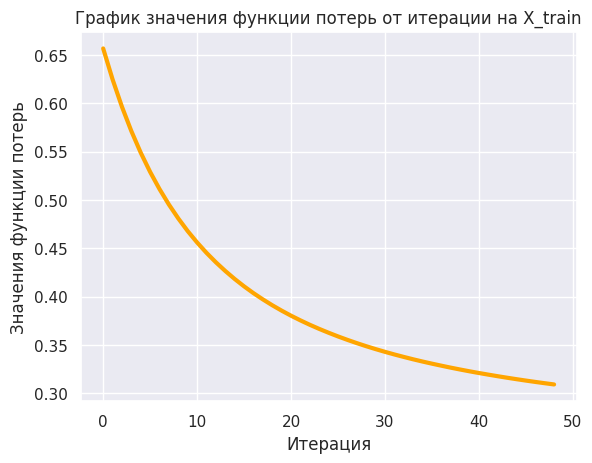

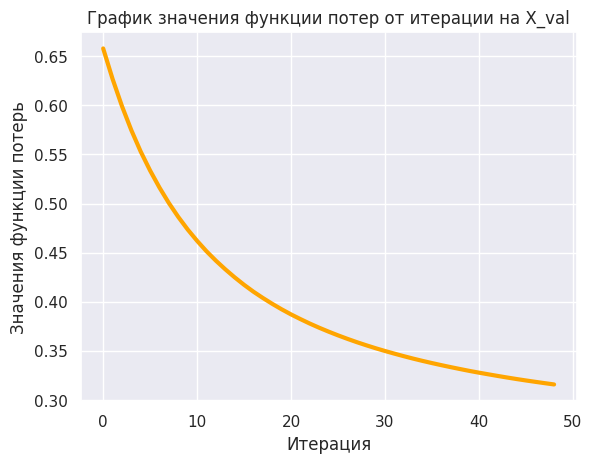

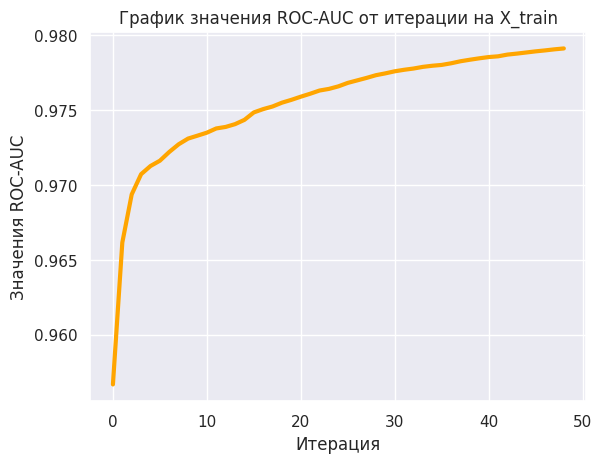

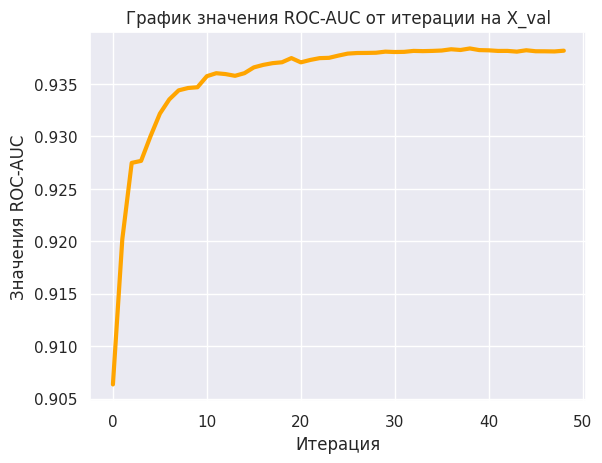

In [65]:
# для оптимального бустинга
best_params = study.best_params
boosting = Boosting(
    n_estimators=best_params["n_estimators"],
    learning_rate=best_params["learning_rate"],
    subsample=best_params["subsample"],
    early_stopping_rounds=10,
    eval_set=(X_valid, y_valid),
    base_model_params={"max_depth": best_params["max_depth"]}
)
boosting.fit(X_train, y_train, plot=True)

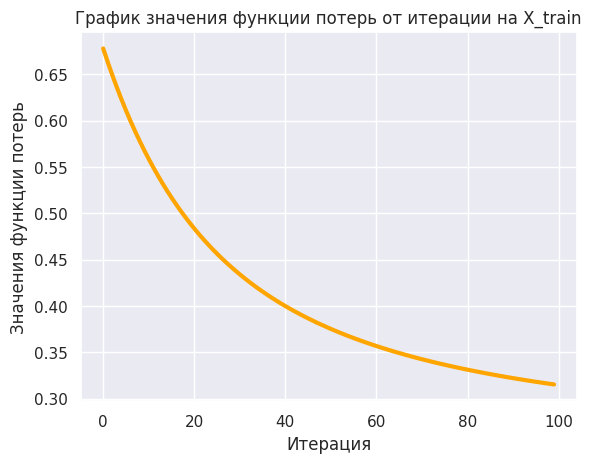

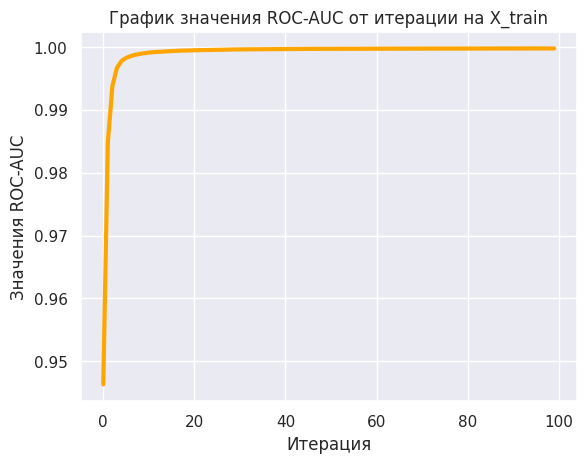

In [66]:
boosting = Boosting()
boosting.fit(X_train, y_train, plot=True)

### 3.2. Глубокая оптимизация (1 балл)

Помимо эффективного перебора гиперпараметров, `optuna` предлагает более тонкий контроль над самой процедурой обучения. Улучшите процедуру оптимизации следующим образом:

1. Посмотрите, как в `optuna` устроена запись в хранилища, и добавьте это в пайплайн оптимизации. Без указания БД все запуски оптуны сотрутся, как только закончится сессия. Более того, так можно распараллелить процесс оптимизации на несколько машин
2. Посмотрите, как можно контролировать процесс обучения бустинга при помощи прунера. У библиотечных имплементаций есть уже готовые, их можно использовать пунктом ниже. Для кастомной модели возьмите что-то из `optuna.pruners`. Идея прунера - не обучать бустинг до конца, если по истории видно, что другие бустинги на этом этапе статистически лучше.
3. Добавьте сохранение истории функции потерь и времени обучения в качестве `user_attribute` сразу в `study`. Мы не хотим оптимизировать их напрямую, но они нам понадобится для сравнения моделей в дальнейшем

Добавьте хранилище и юзер атрибуты и посмотрите, ускорилась ли оптимизация с добавлением прунера

In [ ]:
# *𖣂♱𖠰𖣂↟*𖠰ᨒ↟*𖥧˚

### 3.3. Готовые реализации (1 балл)

Библиотек для бустингов существует много, но активно используются лишь три. Ваша задача - попробовать их в деле, посмотреть на их уникальные фишки и понять, что вам нравится больше всего

Возьмите любую из популярных библиотек: <font color='lightblue'>`xgboost`</font>, <font color='lightgreen'>`lightgbm`</font>, <font color='palegoldenrod'>`catboost`</font>.
Ваша задача - взять одну из них, подобрать те же оптимальные параметры, что и выше, плюс что-то, что вам понравилось в них больше всего (может быть абсолютно любая фишка из пунктов выше или что-то, что вы найдете сами, не обязательно эксклюзивное), и сравнить две оптимизированные модели по
- динамике функции потерь (на обучающей и на валидационной выборке)
- времени обучения

In [ ]:
# *𖣂♱𖠰𖣂↟*𖠰ᨒ↟*𖥧˚

<font color='plum'>**Вопрос:** Какая архитектура вам нравится больше всего и почему?</font>

<font color='plum'>**Ответ**: ... </font>

### Бонус. Random Forest (0.5 балла)

Если очень захотеть, оптуна может оптимизировать все, что угодно, даже нейросети. Давайте противопоставим бустингу его злейшего врага - алгоритм Random Forest.

Возьмите реализацию случайного леса из <font color='lightgreen'>`lightgbm`</font>. Посмотрите, какие там есть гиперпараметры, переберите что-либо из них вместе с `max_depth` и `n_estimators`.

Сравните его качество и динамику функции потерь (на обучающей и на валидационной выборке) с таковыми у бустинга и сделайте вывод, а нужен ли Random Forest?

In [ ]:
# *𖣂♱𖠰𖣂↟*𖠰ᨒ↟*𖥧˚

не успел сделать 3.2 и 3.3, поэтому беру на best boosting с best_params подобранными оптуной в 3.1

### 3.4. Бустинг и вероятности (0.5 балла)

С качеством мы более-менее разобрались, но что насчет вероятностей? Постройте калибровочную кривую для вашей лучшей модели бустинга. Насколько хорошо бустинг оценивает вероятности?

In [69]:
# from hw4
def plot_calibration_curve(y_test, preds, name='default'):
    bin_middle_points = []
    bin_real_ratios = []
    n_bins = 10
    for i in range(n_bins):
        l = 1.0 / n_bins * i
        r = 1.0 / n_bins * (i + 1)
        bin_middle_points.append((l + r) / 2)
        bin_real_ratios.append(np.mean(y_test[(preds >= l) & (preds < r)] == 1))
    #plt.figure(figsize=(6,6))
    if name == 'LR':
      plt.plot(bin_middle_points, bin_real_ratios, label=name, linestyle='-', color='red')
    elif name == 'SVC':
      plt.plot(bin_middle_points, bin_real_ratios, label=name, linestyle='-', color='green')
    else:
      plt.plot(bin_middle_points, bin_real_ratios, label=name, linestyle='-')
    plt.ylim([-0.05, 1.05])
    plt.grid()
    plt.xlabel('Mean predicted probability')
    plt.ylabel('Fraction of positives')
    plt.title('Calibration curves')
    plt.legend()

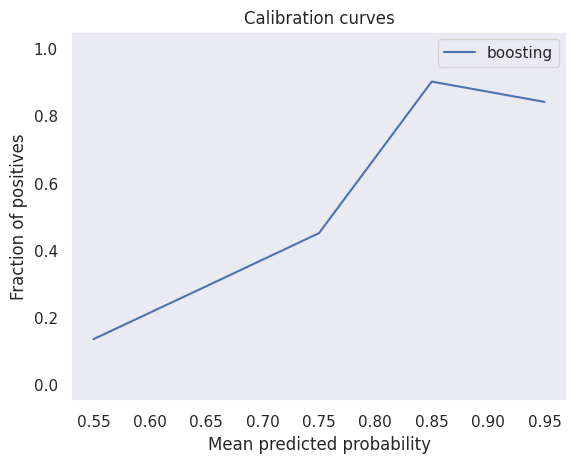

In [70]:
# *𖣂♱𖠰𖣂↟*𖠰ᨒ↟*𖥧˚
from sklearn.calibration import calibration_curve
import matplotlib.pyplot as plt

y_probs = boosting.predict_proba(X_test)[:, 1]

true_probs, pred_probs = calibration_curve(y_test, y_probs, n_bins=10, strategy='uniform')

plot_calibration_curve(y_test, y_probs, name='boosting')


Постройте также калибровочную кривую для логистической регрессии, сравните их между собой. Проанализируйте полученные результаты.

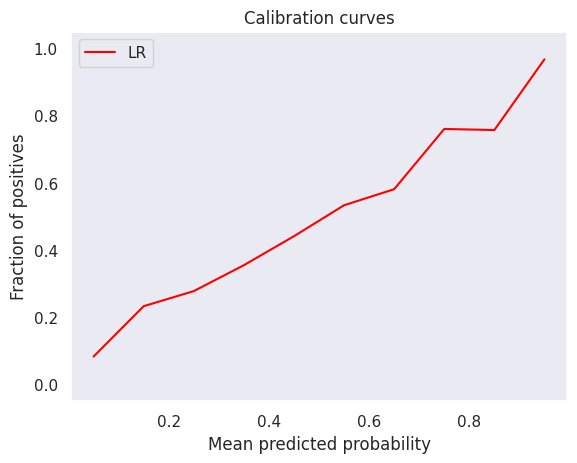

In [71]:
# *𖣂♱𖠰𖣂↟*𖠰ᨒ↟*𖥧˚
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression()
logreg.fit(X_train, y_train)
y_pred_lr = logreg.predict_proba(X_test)[:, 1]
plot_calibration_curve(y_test, y_pred_lr, 'LR')

Получилось, что логрег более приближен к идеальной калибровочной кривой.

## Социализационный бонус. Новогоднее 🎆 (0.5 балла)

Сфотографируйтесь с наряженной новогодней или рождественской ёлкой! Приложите фотографию, опишите свои впечатления, чего вы ждете от нового 2025 года?

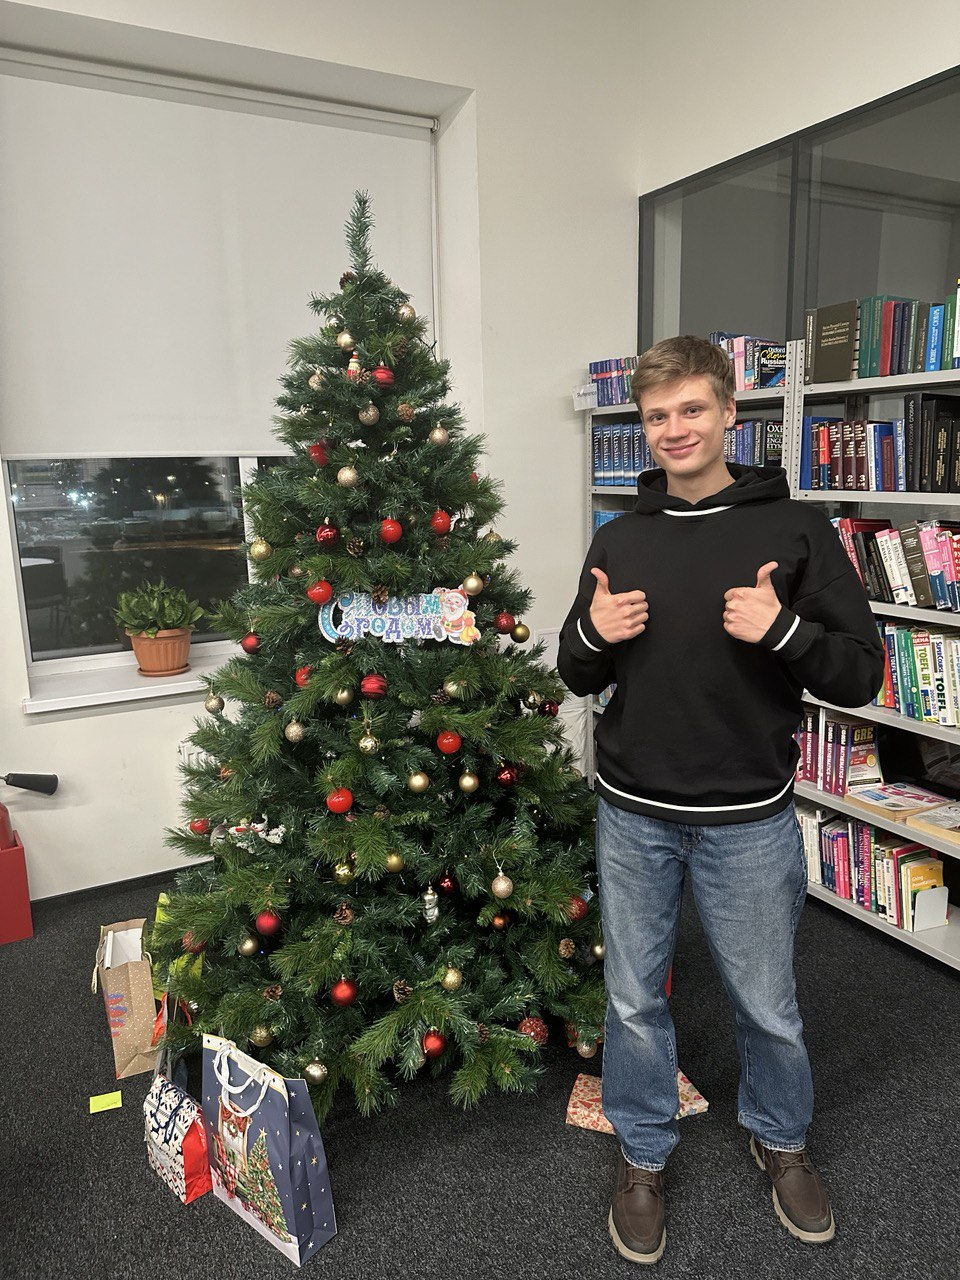

Впечатления от конца года, мягко говоря, не очень хорошие, накопилась усталость... Надеюсь, что в след году летом съездим с друзьями в Грузию или Армению, да и что в целом получится хорошо отдохнуть летом.

# *𖣂♱𖠰𖣂↟*𖠰ᨒ↟*𖥧˚*𖣂♱𖠰𖣂↟*𖠰ᨒ↟*𖥧˚*𖣂♱𖠰𖣂↟*𖠰ᨒ↟*𖥧˚*𖣂♱𖠰𖣂↟*𖠰ᨒ↟*𖥧˚*𖣂♱𖠰𖣂↟*𖠰ᨒ↟*𖥧˚